<a href="https://colab.research.google.com/github/Timure228/Hands-on-ML/blob/main/chapter_18_reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -q -U gym[classic_control,box2d,atari,accept-rom-license]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 16.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.9/719.9 kB 37.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.3/710.3 kB 33.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.5/734.5 kB 34.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.2/732.2 kB 28.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requ

In [ ]:
%pip install -q -U gym

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [ ]:
import gym

# Let's create an environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-pack

In [ ]:
observation = env.reset(seed=42)
observation # [horizontal position, velocity, angle of the pole, angular velocity]

/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [ ]:
# Render the environment as an image
img = env.render()
img[0].shape

(400, 600, 3)

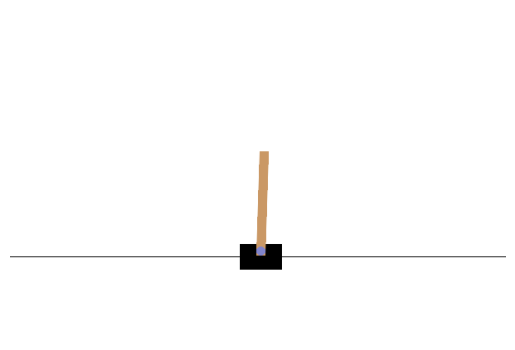

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[0])
plt.axis("off")
plt.show()

In [ ]:
# What actions are possible
env.action_space # in this case Discrete(2) which means integers 0 and 1

Discrete(2)

In [ ]:
# Let's accelerate the cart toward the right to keep the pole straight
action = 1 # accelerate right
obs, reward, done, truncated,  = env.step(action)
obs

AttributeError: module 'numpy' has no attribute 'bool8'

In [ ]:
reward

NameError: name 'reward' is not defined

In [ ]:
done

In [ ]:
truncated

In [ ]:
def basic_policy(obs):
  angle = obs[2]
  return 0 if angle < 0 else 1

totals = []
for episode in range(500):
  episode_rewards = 0
  obs = env.reset(seed=episode)
  for step in range(200):
    action = basic_policy(obs)
    obs, reward, done, truncated = env.step(action)
    episode_rewards += reward
    if done or truncated:
      break

  totals.append(episode_rewards)


In [ ]:
totals[:10]

[41.0, 51.0, 35.0, 36.0, 25.0, 39.0, 32.0, 34.0, 45.0, 48.0]

In [ ]:
import numpy as np
np.mean(totals), np.std(totals), min(totals), max(totals)

(np.float64(41.698), np.float64(8.389445512070509), 24.0, 63.0)

In [ ]:
# Neural Network policy
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### Policy Gradient REINFORCE algorithm

In [ ]:
def play_one_step(env, obs, model, loss_fn):
  with tf.GradientTape() as tape:
    left_proba = model(obs[np.newaxis])
    action = (tf.random.uniform([1, 1]) > left_proba)
    y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
    loss = tf.reduce_mean(loss_fn(y_target, left_proba))

  grads = tape.gradient(loss, model.trainable_variables)
  obs,rewerad, done, turncated = env.step(int(action))
  return obs, reward, done, truncated, grads

In [ ]:
def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn):
  all_rewards = []
  all_grads = []
  for episode in range(n_episodes):
    current_rewards = []
    current_grads = []
    obs = env.reset()
    for step in range(n_max_steps):
      obs, reward, done, turncated, grads = play_one_step(
          env, obs, model, loss_fn)
      current_rewards.append(reward)
      current_grads.append(grads)
      if done or truncated:
        break

    all_rewards.append(current_rewards)
    all_grads.append(current_grads)

  return all_rewards, all_grads

In [ ]:
def discount_rewards(rewards, discount_factor):
  discounted = np.array(rewards)
  for step in range(len(rewards) - 2, -1, -1):
    discounted[step] += discounted[step + 1] * discount_factor
  return discounted

def discount_and_normalize_rewards(all_rewards, discount_factor):
  all_discounted_rewards = [discount_rewards(rewards, discount_factor)
    for rewards in all_rewards]
  flat_rewards = np.concatenate(all_discounted_rewards)
  reward_mean = flat_rewards.mean()
  reward_std = flat_rewards.std()
  return [(discounted_rewards - reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]

In [ ]:
discount_rewards([10, 0 ,-50], discount_factor=0.8)

array([-22, -40, -50])

In [ ]:
discount_and_normalize_rewards([[10, 0, -50], [10, 20]],
                               discount_factor=0.8)

[array([-0.28435071, -0.86597718, -1.18910299]),
 array([1.26665318, 1.0727777 ])]

In [ ]:
n_iterations = 150
n_episodes_per_update = 10
n_max_steps = 200
discount_factor = 0.95

In [ ]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.01)
loss_fn = tf.keras.losses.binary_crossentropy

In [ ]:
# Build and run the training loop
for iteration in range(n_iterations):
  all_rewards, all_grads = play_multiple_episodes(
      env, n_episodes_per_update, n_max_steps, model, loss_fn)
  all_final_rewards = discount_and_normalize_rewards(all_rewards, discount_factor)

  all_mean_grads = []
  for var_index in range(len(model.trainable_variables)):
    mean_grads = tf.reduce_mean(
        [final_reward * all_grads[episode_index][step][var_index] for episode_index, final_rewards in enumerate(all_final_rewards)
          for step, final_reward in enumerate(final_rewards)], axis=0)
    all_mean_grads.append(mean_grads)

  optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

/usr/local/lib/python3.12/dist-packages/tensorflow/python/framework/ops.py:312: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(self._numpy())
/tmp/ipython-input-3158482581.py:13: RuntimeWarning: invalid value encountered in divide
  return [(discounted_rewards - reward_mean) / reward_std for discounted_rewards in all_discounted_rewards]


## Markov Decision Processes

In [ ]:
transition_probabailities = [ # shape=[s, a, s']
                            [[.7, .3, 0.], [1., 0., 0.], [.8, .2, 0.]],
                            [[0., 1., 0.], None, [0., 0., 1.]],
                            [None, [.8, .1, .1], None]
]
rewards = [ # shape =[s, a, s']
    [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
    [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]
]
possible_actions = [[0, 1, 2], [0,2], [1]]

In [ ]:
Q_values = np.full((3, 3), -np.inf) # for impossible actions
for state, actions in enumerate(possible_actions):
  Q_values[state, actions] = 0. # for all possible actions

In [ ]:
Q_values

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

In [ ]:
# Run Q-value iteration algorithm
gamma = .9 # the discount factor

for iteration in range(50):
  Q_prev = Q_values.copy()
  for s in range(3):
    for a in possible_actions[s]:
      Q_values[s, a] = np.sum([
          transition_probabailities[s][a][sp]
          * (rewards[s][a][sp] + gamma * Q_prev[sp].max())
      for sp in range(3)])

In [ ]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
Q_values.argmax(axis=1) # optimal action for each state
# Output is like [best action in state 0, in state 1, in state 2]

array([0, 0, 1])

In [ ]:
def step(state, action):
  probas = transition_probabailities[state][action]
  next_state = np.random.choice([0, 1, 2], p=probas)
  reward = rewards[state][action][next_state]
  return next_state, reward

In [ ]:
def exploration_policy(state):
  return np.random.choice(possible_actions[state])

In [ ]:
alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state

for iteration in range(10_000):
  action = exploration_policy(state)
  next_state, reward = step(state, action)
  next_value = Q_values[next_state].max() #greedy policy at the next step
  alpha = alpha0 / (1 + iteration * decay)
  Q_values[state, action] *= 1 - alpha
  Q_values[state, action] += alpha * (reward + gamma * next_value)
  state = next_state

### Implementing Deep Q-Learning

In [ ]:
input_shape = [4]
n_outputs = 2

model = tf.keras.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(32, activation="elu"),
    tf.keras.layers.Dense(n_outputs)
])

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
  if np.random.rand() < epsilon:
    return np.random.randint(n_outputs) # random action
  else:
    Q_values = model.predict(state[np.newaxis], verbose=0)[0]
    return Q_values.argmax() # optimal action according to the DQN

In [ ]:
from collections import deque

replay_buffer = deque(maxlen=2000)

In [ ]:
def sample_experiences(batch_size):
  indices = np.random.randint(len(replay_buffer), size=batch_size)
  batch = [replay_buffer[index] for index in indices]
  return [
      np.array([experience[field_index] for experience in batch])
      for field_index in range(6)
  ] # [states, actions, rewards, next_states, dones, truncateds]

In [ ]:
def play_one_step(env, state, epsilon):
  action = epsilon_greedy_policy(state, epsilon)
  next_state, reward, done, truncated = env.step(action)
  replay_buffer.append((state, action, reward, next_state, done, truncated))
  return next_state, reward, done, truncated

In [ ]:
batch_size = 32
discount_factor = 0.95
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)
loss_fn = tf.keras.losses.MeanSquaredError

def training_step(batch_size, model=model):
  experiences = sample_experiences(batch_size)
  states, actions, rewards, next_states, dones, truncateds = experiences
  next_Q_values = model.predict(next_states, verbose=0)
  max_next_Q_values = next_Q_values.max(axis=1)
  runs = 1. - (dones | truncateds) # episode is not done or truncated
  target_Q_values = rewards + runs * discount_factor * max_next_Q_values
  target_Q_values = target_Q_values.reshape(-1, 1)
  mask = tf.one_hot(actions, n_outputs)
  with tf.GradientTape() as tape:
    all_Q_values = model(states)
    Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
    loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))

  grads = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [ ]:
for episode in range(600):
  obs = env.reset()
  for step in range(200):
    epsilon = max(1 - episode / 500, 0.01)
    obs, reward, done, truncated = play_one_step(env, obs, epsilon)
    if done or truncated:
      break

  if episode > 50:
    training_step(batch_size)

TypeError: unsupported operand type(s) for |: 'bool' and 'dict'

In [ ]:
target = tf.keras.models.clone_model(model) # clone the model's architecture
target.set_weights(model.get_weights()) # copy the weights

In [ ]:
target.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for episode in range(600):
  obs = env.reset()
  for step in range(200):
    epsilon = max(1 - episode / 500, 0.01)
    obs, reward, done, truncated = play_one_step(env, obs, epsilon)
    if done or truncated:
      break

  if episode % 50:
    target.set_weights(model.get_weights())

KeyboardInterrupt: 

In [ ]:
# DUeling DQN model
input_states = tf.keras.layers.Input(shape=[4])
hidden1 = tf.keras.layers.Dense(32, activation="elu")(input_states)
hidden2 = tf.keras.layers.Dense(32, activation="elu")(hidden1)
state_values = tf.keras.layers.Dense(1)(hidden2)
raw_advantages = tf.keras.layers.Dense(n_outputs)(hidden2)
advantages = raw_advantages - tf.reduce_max(raw_advantages, axis=1,
                                            keepdims=True)
Q_values = state_values + advantages
model = tf.keras.Model(inputs=[input_states], outputs=[Q_values])

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.ops`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
